In [3]:
pip install KNN

  Preparing metadata (setup.py) ... done
  Created wheel for KNN: filename=KNN-1.0.0-py3-none-any.whl size=3111 sha256=59eeb9a4d61c71f3451066a691c5aba502007c6099c7fee1cba4a2465226a558
  Stored in directory: /Users/bay/Library/Caches/pip/wheels/95/51/6d/f63346d97cc5736123d538506481bf9f6d4098c2550bc29345
Successfully built KNN
Note: you may need to restart the kernel to use updated packages.


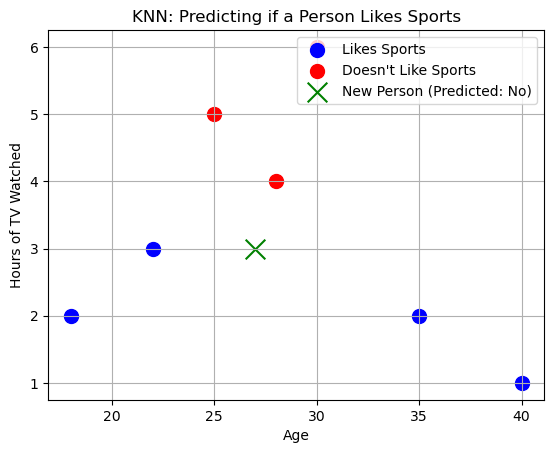

In [25]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import numpy as np

# 1. Create the dataset (Age, Hours of TV Watched) and Labels
X = np.array([
    [18, 2],  # Person 1: Age 18, watches 2 hours of TV
    [22, 3],  # Person 2: Age 22, watches 3 hours of TV
    [25, 5],  # Person 3: Age 25, watches 5 hours of TV
    [28, 4],  # Person 4: Age 28, watches 4 hours of TV
    [30, 6],  # Person 5: Age 30, watches 6 hours of TV
    [40, 1],  # Person 6: Age 40, watches 1 hour of TV
    [35, 2]   # Person 7: Age 35, watches 2 hours of TV
])

y = ['Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes']

# New person to classify
new_person = np.array([[27, 3]])

# 2. Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# 3. Predict the class of the new person
prediction = knn.predict(new_person)

# 4. Plot the data points
for i, label in enumerate(y):
    if label == 'Yes':
        plt.scatter(X[i, 0], X[i, 1], color='blue', label='Likes Sports' if i == 0 else "", s=100)
    else:
        plt.scatter(X[i, 0], X[i, 1], color='red', label='Doesn\'t Like Sports' if i == 2 else "", s=100)

# Plot the new person with a different marker
plt.scatter(new_person[0, 0], new_person[0, 1], color='green', marker='x', s=200, label=f'New Person (Predicted: {prediction[0]})')

# 5. Add labels, title, and legend
plt.xlabel('Age')
plt.ylabel('Hours of TV Watched')
plt.title('KNN: Predicting if a Person Likes Sports')
plt.legend(loc='upper right')

# Show the plot
plt.grid(True)
plt.show()


Is the new country's solar policy likely to succeed? Yes


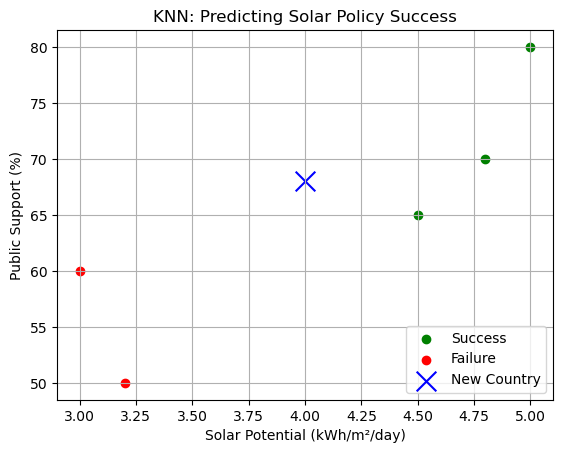

In [27]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# 1. Create a dataset for solar energy policy success
X = np.array([
    [5.0, 80, 2.5, 10, 500],  # Country 1
    [4.8, 70, 2.0, 8, 400],   # Country 2
    [3.0, 60, 1.8, 5, 100],   # Country 3
    [4.5, 65, 2.2, 7, 350],   # Country 4
    [3.2, 50, 1.5, 6, 150]    # Country 5
])

y = ['Yes', 'Yes', 'No', 'Yes', 'No']  # Labels: Policy success (Yes or No)

# 2. Initialize the KNN classifier with K=3
knn = KNeighborsClassifier(n_neighbors=3)

# 3. Train the model using the dataset
knn.fit(X, y)

# 4. Predict the success of a new country's solar policy
new_country = np.array([[4.0, 68, 2.1, 7, 300]])  # Example: New country characteristics
prediction = knn.predict(new_country)

# 5. Output the prediction
print(f"Is the new country's solar policy likely to succeed? {prediction[0]}")


# Import libraries for visualization
import matplotlib.pyplot as plt

# Extract features for plotting (Solar Potential vs Public Support)
solar_potential = X[:, 0]
public_support = X[:, 1]

# Plot data points
for i, label in enumerate(y):
    if label == 'Yes':
        plt.scatter(solar_potential[i], public_support[i], color='green', label='Success' if i == 0 else "")
    else:
        plt.scatter(solar_potential[i], public_support[i], color='red', label='Failure' if i == 2 else "")

# Plot the new country data point
plt.scatter(new_country[0, 0], new_country[0, 1], color='blue', marker='x', s=200, label='New Country')

# Add labels, title, and legend
plt.xlabel('Solar Potential (kWh/m²/day)')
plt.ylabel('Public Support (%)')
plt.title('KNN: Predicting Solar Policy Success')
plt.legend(loc='lower right')

# Show the plot
plt.grid(True)
plt.show()


In [33]:
pip install dash plotly scikit-learn --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 9.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 8.1 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: plotly
    Found existing installation: plotly 5.19.0
    Uninstalling plotly-5.19.0:
      Successfully uninstalled plotly-5.19.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
Note: you may need to restart the kernel to use updated packages.


In [41]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import numpy as np
import plotly.graph_objects as go
from sklearn.neighbors import KNeighborsClassifier

# Initialize the Dash app
app = dash.Dash(__name__)

# Sample dataset (replace this with actual data)
X = np.array([
    [5.0, 80, 2.5, 10, 500],  # Country 1
    [4.8, 70, 2.0, 8, 400],   # Country 2
    [3.0, 60, 1.8, 5, 100],   # Country 3
    [4.5, 65, 2.2, 7, 350],   # Country 4
    [3.2, 50, 1.5, 6, 150]    # Country 5
])

y = ['Yes', 'Yes', 'No', 'Yes', 'No']  # Policy success labels (Yes or No)

# Mapping 'Yes' and 'No' to numeric values for coloring purposes
y_numeric = [1 if label == 'Yes' else 0 for label in y]

# Initialize KNN classifier with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# List of available features
features = ['Solar Potential', 'Public Support', 'GDP Growth', 'Policy Duration', 'Investment']

# Layout of the app
app.layout = html.Div([
    html.H1("Interactive Solar Policy Success Prediction"),

    # Dropdowns to select features for X and Y axes
    html.Label("Select X-axis feature:"),
    dcc.Dropdown(id='x-axis', options=[{'label': f, 'value': i} for i, f in enumerate(features)],
                 value=0),  # Default: Solar Potential
    
    html.Label("Select Y-axis feature:"),
    dcc.Dropdown(id='y-axis', options=[{'label': f, 'value': i} for i, f in enumerate(features)],
                 value=1),  # Default: Public Support

    # Scatter plot
    dcc.Graph(id='scatter-plot'),

    html.Hr(),

    html.H3(id='prediction-output', style={'color': 'blue'})  # Prediction output
])

# Callback to update the scatter plot based on the selected X and Y axes
@app.callback(
    Output('scatter-plot', 'figure'),
    [Input('x-axis', 'value'),
     Input('y-axis', 'value')]
)
def update_scatter_plot(x_axis, y_axis):
    # Extract the selected features for X and Y axes
    x_data = X[:, x_axis]
    y_data = X[:, y_axis]

    # Log for debugging
    print(f"X-axis data: {x_data}")
    print(f"Y-axis data: {y_data}")

    # Create scatter plot
    fig = go.Figure(data=go.Scatter(
        x=x_data, y=y_data,
        mode='markers',
        marker=dict(size=12, color=y_numeric, colorscale='Viridis', showscale=True),
        text=y  # Display the class labels on hover
    ))

    fig.update_layout(
        title="Policy Success Based on Selected Features",
        xaxis_title=features[x_axis],
        yaxis_title=features[y_axis],
        clickmode='event+select'  # Enable clicking on the graph
    )
    return fig

# Callback to predict success/failure based on user click on the plot
@app.callback(
    Output('prediction-output', 'children'),
    [Input('scatter-plot', 'clickData'),
     Input('x-axis', 'value'),
     Input('y-axis', 'value')]
)
def update_prediction(clickData, x_axis, y_axis):
    if clickData is not None:
        try:
            # Get the clicked point's coordinates
            clicked_x = clickData['points'][0]['x']
            clicked_y = clickData['points'][0]['y']

            # Log for debugging
            print(f"Clicked X: {clicked_x}, Clicked Y: {clicked_y}")

            # Create a new input for prediction
            new_input = np.zeros((1, X.shape[1]))  # Create a zero array with the same number of features
            new_input[0, x_axis] = clicked_x  # Set X-axis value
            new_input[0, y_axis] = clicked_y  # Set Y-axis value

            # Use the median of the rest of the features
            for i in range(X.shape[1]):
                if i != x_axis and i != y_axis:
                    new_input[0, i] = np.median(X[:, i])

            # Make prediction using the KNN model
            prediction = knn.predict(new_input)[0]

            return f"Prediction for clicked point: {prediction}"
        
        except Exception as e:
            return f"Error occurred: {str(e)}"

    return "Click on a point in the plot to make a prediction."

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port = 8505)


In [42]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import numpy as np
import plotly.graph_objects as go
from sklearn.neighbors import KNeighborsClassifier

# Initialize the Dash app
app = dash.Dash(__name__)

# Sample dataset (replace this with actual data)
X = np.array([
    [5.0, 80, 2.5, 10, 500],  # Country 1
    [4.8, 70, 2.0, 8, 400],   # Country 2
    [3.0, 60, 1.8, 5, 100],   # Country 3
    [4.5, 65, 2.2, 7, 350],   # Country 4
    [3.2, 50, 1.5, 6, 150]    # Country 5
])

y = ['Yes', 'Yes', 'No', 'Yes', 'No']  # Policy success labels (Yes or No)

# Mapping 'Yes' and 'No' to numeric values for coloring purposes
y_numeric = [1 if label == 'Yes' else 0 for label in y]

# Initialize KNN classifier with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# List of available features
features = ['Solar Potential', 'Public Support', 'GDP Growth', 'Policy Duration', 'Investment']

# Layout of the app
app.layout = html.Div([
    html.H1("Interactive Solar Policy Success Prediction"),

    # Dropdowns to select features for X and Y axes
    html.Label("Select X-axis feature:"),
    dcc.Dropdown(id='x-axis', options=[{'label': f, 'value': i} for i, f in enumerate(features)],
                 value=0),  # Default: Solar Potential
    
    html.Label("Select Y-axis feature:"),
    dcc.Dropdown(id='y-axis', options=[{'label': f, 'value': i} for i, f in enumerate(features)],
                 value=1),  # Default: Public Support

    # Scatter plot
    dcc.Graph(id='scatter-plot'),

    html.Hr(),

    html.H3(id='prediction-output', style={'color': 'blue'})  # Prediction output
])

# Callback to update the scatter plot based on the selected X and Y axes
@app.callback(
    Output('scatter-plot', 'figure'),
    [Input('x-axis', 'value'),
     Input('y-axis', 'value')]
)
def update_scatter_plot(x_axis, y_axis):
    # Extract the selected features for X and Y axes
    x_data = X[:, x_axis]
    y_data = X[:, y_axis]

    # Log for debugging
    print(f"X-axis data: {x_data}")
    print(f"Y-axis data: {y_data}")

    # Create scatter plot
    fig = go.Figure(data=go.Scatter(
        x=x_data, y=y_data,
        mode='markers',
        marker=dict(size=12, color=y_numeric, colorscale='Viridis', showscale=True),
        text=y  # Display the class labels on hover
    ))

    fig.update_layout(
        title="Policy Success Based on Selected Features",
        xaxis_title=features[x_axis],
        yaxis_title=features[y_axis],
        clickmode='event+select'  # Enable clicking on the graph
    )
    return fig

# Callback to predict success/failure based on user click on the plot
@app.callback(
    Output('prediction-output', 'children'),
    [Input('scatter-plot', 'clickData'),
     Input('x-axis', 'value'),
     Input('y-axis', 'value')]
)
def update_prediction(clickData, x_axis, y_axis):
    if clickData is not None:
        try:
            # Get the clicked point's coordinates
            clicked_x = clickData['points'][0]['x']
            clicked_y = clickData['points'][0]['y']

            # Log for debugging
            print(f"Clicked X: {clicked_x}, Clicked Y: {clicked_y}")

            # Create a new input for prediction
            new_input = np.zeros((1, X.shape[1]))  # Create a zero array with the same number of features
            new_input[0, x_axis] = clicked_x  # Set X-axis value
            new_input[0, y_axis] = clicked_y  # Set Y-axis value

            # Use the median of the rest of the features
            for i in range(X.shape[1]):
                if i != x_axis and i != y_axis:
                    new_input[0, i] = np.median(X[:, i])

            # Make prediction using the KNN model
            prediction = knn.predict(new_input)[0]

            return f"Prediction for clicked point: {prediction}"
        
        except Exception as e:
            return f"Error occurred: {str(e)}"

    return "Click on a point in the plot to make a prediction."

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port = 8056)
